# KNN

## Problem:
A telecommunications provider wants to segment its customers into four groups based on service usage patterns. The segmentattion focuses on demographic data, such as region, age, and marital, to predict usage patterns.

Steps:
1. Choose number of k
2. find distance with k points 
3. Among these k points, count points from each category 
4. The point goes to the category with highest number of points 
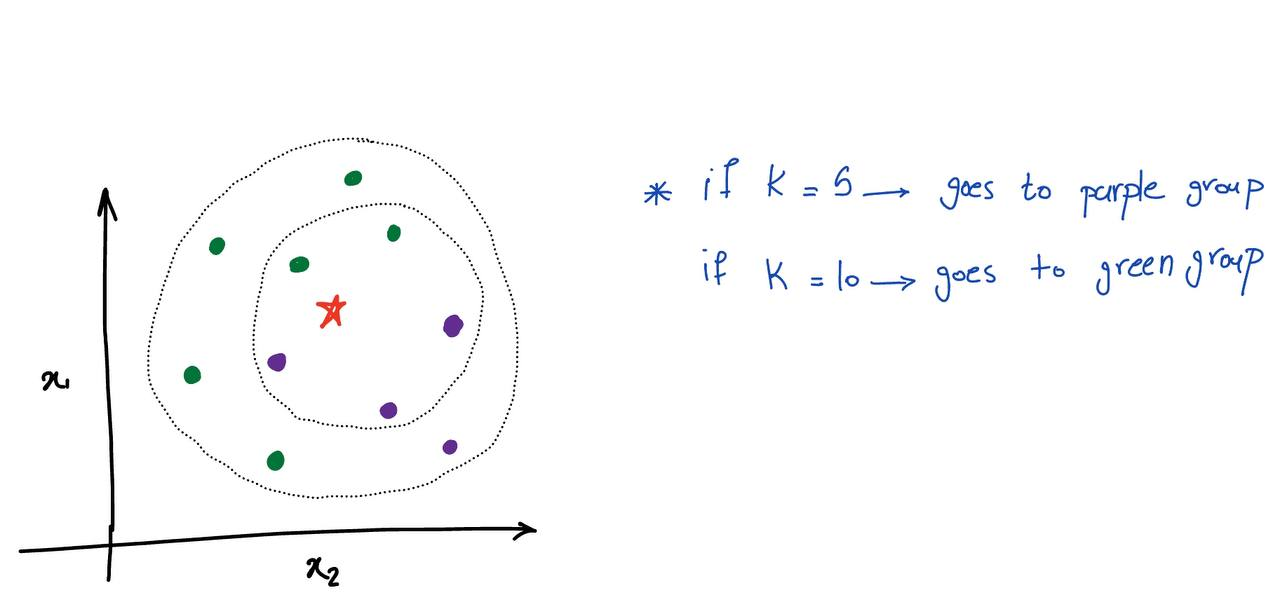

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
%matplotlib inline

In [ ]:
!wget -O teleCust1000t.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv

--2023-04-18 22:46:55--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36047 (35K) [text/csv]
Saving to: ‘teleCust1000t.csv’

teleCust1000t.csv   100%[===================>]  35.20K  --.-KB/s    in 0.003s  

2023-04-18 22:46:55 (9.90 MB/s) - ‘teleCust1000t.csv’ saved [36047/36047]



In [ ]:
#Load Data From CSV File
df = pd.read_csv('teleCust1000t.csv')
df.head(10)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
5,2,41,39,0,17,78.0,2,16,0.0,1,1,3
6,3,45,22,1,2,19.0,2,4,0.0,1,5,2
7,2,38,35,0,5,76.0,2,10,0.0,0,3,4
8,3,45,59,1,7,166.0,4,31,0.0,0,5,3
9,1,68,41,1,21,72.0,1,22,0.0,0,3,2


The target is called custcat, has four values that correspond to the four customer groups, as follows: 
1. Basic Service 
2. E-Service 
3. Plus Service
4. Total Service

In [ ]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [ ]:
#convert the Pandas data frame to a Numpy array

x = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values 
y = df['custcat'].values
print(x[0])
print(y[0])

[ 2. 13. 44.  1.  9. 64.  4.  5.  0.  0.  2.]
1


In [ ]:
#Data preprocessing 
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
print(x[0])
print(y[0])

[-0.02696767 -1.055125    0.18450456  1.0100505  -0.25303431 -0.12650641
  1.0877526  -0.5941226  -0.22207644 -1.03459817 -0.23065004]
1


In [ ]:
#splitting train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42)

In [ ]:
#Train the model
from sklearn.neighbors import KNeighborsClassifier
k = 4
classifier_knn = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)

In [ ]:
#Prediction
Predicted_y = classifier_knn.predict(x_test)

In [ ]:
#Evaluation 
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, classifier_knn.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, Predicted_y))

Train set Accuracy:  0.54375
Test set Accuracy:  0.325


In [ ]:
#Finding the  optimum K
opt_K = 15
accuracy = np.zeros((opt_K-1)) 

for i in range(1,opt_K):
    classifier_knn = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    Predicted_y = classifier_knn.predict(x_test)
    accuracy[i-1] = metrics.accuracy_score(y_test, Predicted_y)
    print('K is: ', i ,'and accuracy is :' , accuracy[i-1])

K is:  1 and accuracy is : 0.29
K is:  2 and accuracy is : 0.34
K is:  3 and accuracy is : 0.365
K is:  4 and accuracy is : 0.325
K is:  5 and accuracy is : 0.33
K is:  6 and accuracy is : 0.33
K is:  7 and accuracy is : 0.33
K is:  8 and accuracy is : 0.335
K is:  9 and accuracy is : 0.33
K is:  10 and accuracy is : 0.35
K is:  11 and accuracy is : 0.355
K is:  12 and accuracy is : 0.345
K is:  13 and accuracy is : 0.345
K is:  14 and accuracy is : 0.375


In [ ]:
print( "The best accuracy was with", accuracy.max(), "with k=", accuracy.argmax()+1) 

The best accuracy was with 0.375 with k= 14
